# NLP Practical example: Simple Sentiment Analysis model 

Let's build a complete sentiment analysis system from scratch! We'll classify movie reviews as positive or negative.

In [1]:
import re
import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Preparation

For this example, we'll create a small dataset.

In practice, you'd use datasets like [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [2]:
sample_reviews = [
        # Positive reviews (label = 1)
        ("This movie was excellent! I loved every minute of it.", 1),
        ("Amazing film with great acting and storyline.", 1),
        ("Absolutely fantastic! Best movie I've seen this year.", 1),
        ("Wonderful performances and beautiful cinematography.", 1),
        ("I really enjoyed this movie. Highly recommend!", 1),
        ("Great entertainment! The plot was engaging.", 1),
        ("Superb direction and outstanding cast.", 1),
        ("This film exceeded all my expectations.", 1),
        ("Brilliant! A must-watch for everyone.", 1),
        ("Incredible movie with a powerful message.", 1),
        ("Loved the story and the characters!", 1),
        ("Perfect movie night! So entertaining!", 1),
        ("Exceptional work by the entire team.", 1),
        ("Highly satisfying and well-made film.", 1),
        ("One of the best movies ever made!", 1),
        # Negative reviews (label = 0)
        ("Terrible movie. Complete waste of time.", 0),
        ("I hated it. The plot made no sense.", 0),
        ("Boring and poorly acted. Don't watch it.", 0),
        ("Awful film. I couldn't finish it.", 0),
        ("The worst movie I've ever seen.", 0),
        ("Disappointing and dull throughout.", 0),
        ("Poor storyline and bad acting.", 0),
        ("I strongly dislike this movie.", 0),
        ("Horrible! Not worth your money.", 0),
        ("Extremely boring and predictable.", 0),
        ("Waste of money and time. Terrible!", 0),
        ("I want my money back. So bad!", 0),
        ("Poorly made with no redeeming qualities.", 0),
        ("Absolutely horrible film. Avoid it!", 0),
        ("Unwatchable. Complete disaster.", 0),
]

In [3]:
df = pd.DataFrame(sample_reviews, columns=['review', 'sentiment'])
df.head()

,review,sentiment
0,This movie was excellent! I loved every minute...,1
1,Amazing film with great acting and storyline.,1
2,Absolutely fantastic! Best movie I've seen thi...,1
3,Wonderful performances and beautiful cinematog...,1
4,I really enjoyed this movie. Highly recommend!,1


### Data Exaploration

In [4]:
df.shape

(30, 2)

In [5]:
# check sentiment distribution
df['sentiment'].value_counts()

sentiment
1    15
0    15
Name: count, dtype: int64

In [6]:
# check for missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## Step 2: Text Preprocessing

In [7]:
# Run this cell only once to download NLTK resources
nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/nemsys/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/nemsys/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nemsys/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nemsys/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def preprocess_text(text):
    """
    Complete text preprocessing pipeline

    Args:
        text (str): Raw text input

    Returns:
        str: Cleaned and processed text
    """
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Tokenize into words
    tokens = word_tokenize(text)

    # 4. Remove stopwords (but keep negations!)
    stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor', 'neither', 'never'}
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatization (reduce words to base form)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join tokens back into string
    return ' '.join(tokens)

# Apply preprocessing to the reviews
df['cleaned_review'] = df['review'].apply(preprocess_text)
df.head()

,review,sentiment,cleaned_review
0,This movie was excellent! I loved every minute...,1,movie excellent loved every minute
1,Amazing film with great acting and storyline.,1,amazing film great acting storyline
2,Absolutely fantastic! Best movie I've seen thi...,1,absolutely fantastic best movie ive seen year
3,Wonderful performances and beautiful cinematog...,1,wonderful performance beautiful cinematography
4,I really enjoyed this movie. Highly recommend!,1,really enjoyed movie highly recommend


## Step 3: Split Data

In [9]:
# Split features and labels
X = df['cleaned_review']
y = df['sentiment']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 24
Test set size: 6


## Step 4: Vectorization

In [10]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100, ngram_range=(1, 2))

# Fit on training data and transform both sets
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training matrix shape: {X_train_tfidf.shape}")
print(f"Test matrix shape: {X_test_tfidf.shape}")

Training matrix shape: (24, 100)
Test matrix shape: (6, 100)


## Step 5: Train Model

In [11]:
# Train Logistic Regression classifier
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_tfidf, y_train)

print("Model trained successfully!")

Model trained successfully!


In [12]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Feature Importance Analysis

We can get the most important features from model coeffcients.

Model coefficients are a measure of how much a feature contributes to the classification score.

The most important features are those with the largest absolute coefficients.

- Large Positive Coefficients → Features strongly indicating Positive Sentiment (Class 1).
- Large Negative Coefficients → Features strongly indicating Negative Sentiment (Class 0).

In [13]:
# Get the model coefficients
# We take the first row [0] because it's a binary classification problem.
coefficients = model.coef_[0]

# Create a Series to map coefficients to feature names
feature_names = vectorizer.get_feature_names_out()
coef_df = pd.Series(coefficients, index=feature_names)

In [14]:
## Top 10 Features Indicating POSITIVE Sentiment
print("--- Top 10 Features for POSITIVE Sentiment (Highest Coefficients) ---")
# .nlargest(10) gets the largest positive coefficients
top_positive = coef_df.nlargest(10)
print(top_positive)

print("\n" + "="*50 + "\n")

## Top 10 Features Indicating NEGATIVE Sentiment
print("--- Top 10 Features for NEGATIVE Sentiment (Lowest Coefficients) ---")
# .nsmallest(10) gets the largest negative coefficients
top_negative = coef_df.nsmallest(10)
print(top_negative)

--- Top 10 Features for POSITIVE Sentiment (Highest Coefficients) ---
highly               0.366471
loved                0.324004
beautiful            0.280907
cinematography       0.280907
great                0.273958
highly satisfying    0.245159
character            0.230832
loved story          0.230832
cast                 0.198631
direction            0.198631
dtype: float64


--- Top 10 Features for NEGATIVE Sentiment (Lowest Coefficients) ---
money               -0.442020
complete            -0.344446
boring              -0.336946
horrible            -0.320284
terrible            -0.290212
time                -0.290212
waste               -0.290212
dislike             -0.274153
dislike movie       -0.274153
complete disaster   -0.234484
dtype: float64


## Evaluate Model

In [15]:
# Make predictions to evaluate the model
y_pred = model.predict(X_test_tfidf)

### Calculate accuracy

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4%}")


Accuracy: 50.0000%


### Detailed classification report

The report provides four main metrics for each class: Precision, Recall, F1-Score, and Support.

1. Precision

Precision measures the proportion of a model's positive predictions that are correct, calculated as \(TruePositives/(TruePositives+FalsePositives)\)
- The ability of the classifier not to label as positive a sample that is negative. In simple terms, out of all the instances the model predicted as a certain class (e.g., 'Negative'), how many were actually correct?

2. Recall (or Sensitivity)

- The ability of the classifier to find all the positive samples. In simple terms, out of all the instances that truly belong to a certain class (e.g., 'Negative'), how many did the model correctly identify?

In [17]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.50      0.67      0.57         3
    Positive       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



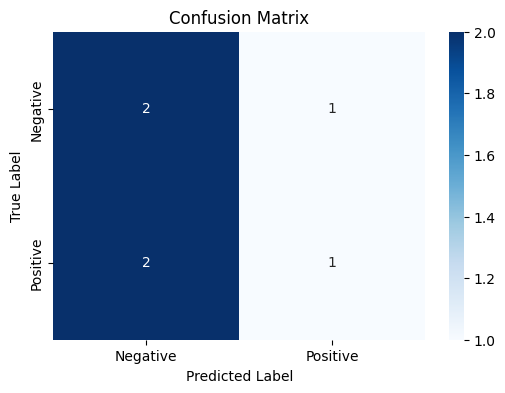

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Strategies to Increase Model Accuracy

### 1. Data-Centric Strategies (Step 1)

The most critical factor in the current 50% accuracy is the **extremely small dataset** (30 total reviews, leading to a test set of 6 reviews). In Machine Learning, especially NLP, data quality and quantity are paramount.

* **Acquire More Data (Crucial):**    
    * **Why:** With only 30 samples, the model is simply memorizing those few examples (*overfitting*) and cannot generalize to unseen data, regardless of how complex the model or preprocessing is.

    * **Action:** Replace the `create_dataset()` function with one that loads a public, larger, and more realistic sentiment dataset. A good starting point would be [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

    We can use: 

    ```python
    
    import kagglehub

    # Download latest version
    path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

    print("Path to dataset files:", path)
    ```
    

* **Ensure Data Balance:**
    * **Action:** Since the sample data is perfectly balanced (15 positive, 15 negative), ensure that whatever larger dataset you adopt maintains a reasonable balance. If it's heavily skewed (e.g., 90% positive), employ **stratified sampling** during the train-test split, which is already done (`stratify=y`).

### 2. Preprocessing Strategies (Step 2)

We can enhance the preprocessing robustness for a larger dataset.

* **Handle Contractions:**
    * **Action:** Add a step to expand common contractions (e.g., "I'm" $\to$ "I am", "don't" $\to$ "do not"). This ensures tokens like "do not" are vectorized consistently, especially since we are carefully preserving negations.

* **Stemming vs. Lemmatization:**
    * **Action:** We are using the more precise **Lemmatization**. If the dataset is vast, the speed of **Stemming**  might be preferred, but Lemmatization often yields better accuracy, so we will stick with it unless performance is an issue.

* **Address Repeated Characters (Optional):**
    * **Action:** We can implement a regex to handle repeated characters common in sentiment text (e.g., "looooved" $\to$ "loved", "terribleee" $\to$ "terrible"). This helps normalize vocabulary.

### 3. Vectorization Strategies (Step 4)

The current settings of `TfidfVectorizer` with bigrams are too restrictive for a larger dataset.

* **Increase `max_features` (Crucial):**
    * **Action:** Increase `max_features` from `100` to a much larger number, such as **10,000** or `None`. With only 100 features, we are throwing away most of the unique words that could contain valuable sentiment information in a larger dataset.

* **Adjust `ngram_range`:**
    * **Action:** Keep `ngram_range=(1, 2)` (unigrams and bigrams), as bigrams often capture important phrases like "not good" or "very bad."  Experiment with `(1, 3)` (including trigrams, to capture phrases like "money for nothing").

### 4. Model & Training Strategies (Step 5)

* **Tune Logistic Regression Hyperparameters:**
    * **Action:** Use **Cross-Validation** with a grid search (`GridSearchCV` from `sklearn.model_selection`) to find the best hyperparameters for the `LogisticRegression` model.

* **Try Different Models (Optional):**
    * **Action:** If Logistic Regression doesn't reach the target accuracy, experiment with other classification algorithms like:
        * **Support Vector Machines (SVC):** Excellent for text classification.
        * **Naive Bayes (MultinomialNB):** A very strong, simple baseline for text data.
        * **Ensemble Methods (e.g., RandomForestClassifier):** Can often provide better generalization.

### 5. Advanced Strategy (Beyond Bag-of-Words)

Once we have a really large dataset, we can move beyond TF-IDF to modern techniques.

* **Word Embeddings (Deep Learning):**
    * **Action:** Use pre-trained word embeddings like **Word2Vec** or **GloVe**, or better yet, context-aware embeddings from **BERT** or **RoBERTa**. These models understand the **meaning** of words based on their context, not just their frequency, which is significantly more powerful for sentiment.